# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [4]:
import numpy as np
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [31]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    return np.dot(a,b).tolist()

---

In [32]:
# Test mul() function
mul(my_x, my_w)

15

In [12]:
# Define a scalar: bias b
my_b = -5

In [43]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    res = np.dot(x,weights)+bias
    if isinstance(res,np.int32):
        return res
    return sum(res.tolist())

In [44]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [45]:
# Import exp() function (safe on lists)
from numpy import exp

In [52]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    return 1/(1+exp(-z))

---

In [53]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [54]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

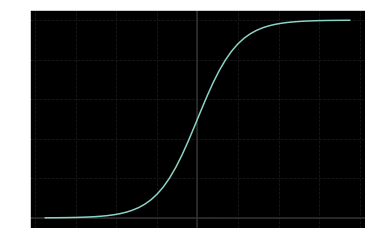

In [55]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [56]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    return linear_neuron(x, weights, bias)

---

In [57]:
# Test neuron() function
neuron(my_x, my_w, my_b)

10

In [58]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    return x[0] or x[1]

---

In [59]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [60]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 1.000


In [61]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    return x[0] and x[1]

---

In [62]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.000
[1, 0] 0.000
[1, 1] 1.000


In [71]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    if x[0]==0:
        return 1
    if x[0]==1:
        return 0

---

In [72]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 1.000
[1] 0.000


![X-OR](res/x-or_circuit.png)

In [81]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    
    res = or_neuron([and_neuron([not_neuron([x[0]]),x[1]]),and_neuron([not_neuron([x[1]]),x[0]])])
    return res

---

In [82]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 0.000


![Half-adder](res/half-adder_circuit.png)

In [ ]:
# Combine a XOR and an AND into a half-adder


---

![Adder](res/adder_circuit.png)

In [83]:
# Combine two half-adders and an OR into a (full) adder
def adder(a,b,c):
    s = xor_neuron(xor_neuron(a,b),c)
    c = or_neuron(and_neuron(xor_neuron(a,b),c),and_neuron(a,b))
    return s,c

---